<a href="https://colab.research.google.com/github/jisazac/pythonfinanzaseafit/blob/master/Clase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/b/bf/EAFIT-2015.png" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado Python para Finanzas</h1>




<p><a name="contents"></a></p>

# Contenido Clase 3


- <a href="#revisitando">1. Revisitando Pandas</a><br>
- <a href="#revisitando">2. Caso Integrador Pandas</a><br>
- <a href="#stats">3. Estadistica descriptiva</a><br>
- <a href="#models">4. Modelos y Conceptos</a><br>



<p><a name="revisitando"></a></p>

# 1.0 Revisitando Pandas

Revisemos que tipo de operaciones podemos realizar sobre un DataFrame de pandas. A partir de este punto, los dataframes van a ser nuestro objeto de partida.

<p><a name="manipulacionDatos"></a></p>

## 1.1. Manipulación de datos

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/ventas.csv") 

In [ ]:
df.head()

,Fecha,Producto1,Producto2,Producto3,Producto4
0,01/01/2009,29,20,35,NaN
1,02/01/2009,19,3,22,NaN
2,03/01/2009,24,12,22,NaN
3,04/01/2009,24,8,15,NaN
4,05/01/2009,120,111,141,NaN


In [ ]:
# El atributo columns nos permite recuperar el nombre de las columns
# en un objeto iterable
df.columns

Index(['Fecha', 'Producto1', 'Producto2', 'Producto3', 'Producto4'], dtype='object')

In [ ]:
#El atributo shape nos permite conocer las dimensiones de nuestro dataframe
# retornando una tupla (filas,columnas)
df.shape

(365, 5)

In [ ]:
#El metodo describe retorna un dataframe que contiene las estadisticas descriptivas
# de las columnas numericas del  dataframe  
df.describe()

,Producto1,Producto2,Producto3,Producto4
count,365.000000,365.000000,365.000000,178.000000
mean,2032.200000,1060.252055,2093.169863,2576.359551
std,1878.879799,1079.533086,1854.368523,2484.004743
min,0.000000,0.000000,0.000000,0.000000
25%,194.000000,90.000000,228.000000,0.000000
50%,1726.000000,678.000000,1686.000000,1443.500000
75%,3540.000000,1882.000000,3520.000000,4638.000000
max,6626.000000,4242.000000,6587.000000,7575.000000


<p><a name="formateo"></a></p>

## 1.2. Formateo de datos temporales

La función `to_datetime` de la libreria pandas permite convertir los datos a un formato especial de tiempo

In [ ]:
pd.to_datetime(df.Fecha).head()

0   2009-01-01
1   2009-02-01
2   2009-03-01
3   2009-04-01
4   2009-05-01
Name: Fecha, dtype: datetime64[ns]

In [ ]:
#Aqui en el arguemnto format introducimos
#el formato de fecha que se ajuste a los datos

pd.to_datetime(df.Fecha, format='%d/%m/%Y').head()

0   2009-01-01
1   2009-01-02
2   2009-01-03
3   2009-01-04
4   2009-01-05
Name: Fecha, dtype: datetime64[ns]

In [ ]:
#Aqui reemplazamos la columna Fecha por si misma pero en formato datetime
df.Fecha=pd.to_datetime(df.Fecha)

#El metodo index nos permite convertir una pseries del dataframe en el
# nuevo index del dataframe
df.set_index('Fecha', inplace=True)
df.head()

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


<p><a name="formateo2"></a></p>

### 1.2.1. Otros formatos para la función datetime
- **%a**	Nombre del día de la semana abreviado en inglés. Ejemplo:	Sun, Mon, ...

- **%A**	Nombre completo del día de la semana e inglés.	Ejemplo: Sunday, Monday, ...

- **%w**	Día de la semana como número decimal.	Ejemplo: 0, 1, ..., 6

- **%d** Día del mes como número con dos digitos.	01, 02, ..., 31

- **%-d**	Dia del mes como numero decimal. Ejemplo:	1, 2, ..., 30

- **%b**	Nombre abreviado del mes en inglés. Ejemplo:	Jan, Feb, ..., Dec

- **%B**	Nombre completo del mes en inglés. Ejemplo:	January, February, ...

- **%m**	Mes como número con dos digitos. Ejemplo:	01, 02, ..., 12

- **%-m**	Mes como número decimal. Ejemplo:	1, 2, ..., 12

- **%Y**	Año como número decimal.	2013, 2019 etc.

- **%H**	Hora en formato 24 horas como número de 2 digitos. Ejemplo:	00, 01, ..., 23

- **%-H**	Hora en formato 24 horas como número decimal. Ejemplo:	0, 1, ..., 23

- **%I**	Hora en formato 12 horas como número con dos digitos.	Ejemplo: 01, 02, ..., 12

- **%-I** Hora en formato 12 horas como número decimal.	Ejemplo: 1, 2, ... 12

- **%p**	 AM o PM.	

- **%M**	Minutos como números de dos digitos. Ejemplo:	00, 01, ..., 59

- **%-M**	Minutos como números decimales. Ejemplo:	0, 1, ..., 59

- **%S**	Segundos como números en dos digitos.	00, 01, ..., 59

- **%-S**	Segundos como número decimal. Eejmplo:	0, 1, ..., 59

- **%Z**	Nombre de la zona horaria.	 

- **%-j**	Dia del año como numero decimal. Ejemplo:	1, 2, ..., 366

- **%U**	Número de semana del año, contando como día inicial los domingos. Todos los dias previos al primer domingo van en la semana 0. Ejemplo:	00, 01, ..., 53

- **%W**	Número de semana del año, contando como día inicial los lunes. Todos los dias previos al primer lunes del año se les asigna la semana 0. Ejmplo:	00, 01, ..., 53

- **%%**	Literalmente el caracter '%':	%

In [ ]:
# Veamos un ejemplo

#Importamos la funcion datetime del paquete datetime
from datetime import datetime

now = datetime.now() # La variable now va a contener la fecha y hora actual

#Extraigamos el año
year = now.strftime("%Y")
print("year:", year)

#Extragamos el mes
month = now.strftime("%m")
print("month:", month)

#Extragamos el dia
day = now.strftime("%d")
print("day:", day)

#Extragamos la hora
time = now.strftime("%H:%M:%S")
print("time:", time)

#Extraigamos la fecha y hora
date_time = now.strftime("'%d/%m/%Y', %H:%M:%S")
print("fecha y hora:",date_time)

year: 2020
month: 09
day: 10
time: 17:18:42
fecha y hora: '10/09/2020', 17:18:42


<p><a name="procesamientoNulos"></a></p>

## 1.3. Procesamiento de datos nulos

La presencia de datos dulos es una molestia constante en los proyectos de ciencia de datos o cualquier otro proyecto que requiera procesar informacion de distintas fuentes.

In [ ]:
#El metodo isna() retorna un boolean indicando si la entrada del dataframe es
# nula o contiene información.
df.isna().head() 

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-01-01,False,False,False,True
2009-02-01,False,False,False,True
2009-03-01,False,False,False,True
2009-04-01,False,False,False,True
2009-05-01,False,False,False,True


Usar el comando `fillna()` para reemplazar los valores nulos con el valor deseado. Puede hacerse en una sola columna `df.columna.fillna()` o en todas al mismo tiempo `df.fillna()` 

In [ ]:
# Solo visual
df.Producto4.fillna(0)

Fecha
2009-01-01    0.0
2009-02-01    0.0
2009-03-01    0.0
2009-04-01    0.0
2009-05-01    0.0
             ... 
2009-12-27    0.0
2009-12-28    0.0
2009-12-29    0.0
2009-12-30    0.0
2009-12-31    0.0
Name: Producto4, Length: 365, dtype: float64

In [ ]:
# Cambiando los datos
df.Producto4.fillna(df.Producto4.mean(),inplace=True) #Importante inplace

<p><a name="indexacion"></a></p>

## 1.4. Indexación y localización
Usando los comandos `iloc` y `loc`  en un dataframe, se puede acceder a los datos con base en las etiquetas y la ubicación respectivamente 

In [ ]:
df.iloc[100:110]

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-11-04,0,0,0,2576.359551
2009-12-04,0,0,0,2576.359551
2009-04-13,0,0,0,2576.359551
2009-04-14,0,0,0,2576.359551
2009-04-15,0,0,0,2576.359551
2009-04-16,0,0,0,2576.359551
2009-04-17,1286,820,1436,2576.359551
2009-04-18,1178,667,826,2576.359551
2009-04-19,2131,1155,1426,2576.359551


Indexación para un subconjunto de columnas

In [ ]:
df[['Producto1','Producto4']].iloc[100:110]

,Producto1,Producto4
Fecha,,
2009-11-04,0,2576.359551
2009-12-04,0,2576.359551
2009-04-13,0,2576.359551
2009-04-14,0,2576.359551
2009-04-15,0,2576.359551
2009-04-16,0,2576.359551
2009-04-17,1286,2576.359551
2009-04-18,1178,2576.359551
2009-04-19,2131,2576.359551


In [ ]:
df.iloc[:,1:3]

,Producto2,Producto3
Fecha,,
2009-01-01,20,35
2009-02-01,3,22
2009-03-01,12,22
2009-04-01,8,15
2009-05-01,111,141
...,...,...
2009-12-27,29,52
2009-12-28,41,99
2009-12-29,52,115


In [ ]:
#Tambien es posible realizr localizacion a partir de fechas
df.loc["2009-10-01":"2009-10-10"]

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-10-01,81,45,79,2576.359551
2009-10-02,228,101,260,2576.359551
2009-10-03,366,203,354,2576.359551
2009-10-04,0,0,0,2576.359551
2009-10-05,728,362,523,2576.359551
2009-10-06,3460,2354,3978,2576.359551
2009-10-07,6274,4242,5435,7268.000000
2009-10-08,2999,1545,3185,4187.000000
2009-10-09,5496,2921,6587,6520.000000


Parar reasignar un valor de dataframe, simplemente se debe saber la localización, ya sea por indice o por etiqueta y usar el operador de asignación `=`

In [ ]:
df.iloc[109,0]=1000

In [ ]:
df.loc['2009-04-19','Producto1']=999

Validemos la re-asignación de los valores

In [ ]:
df[['Producto1']].iloc[108:110]

,Producto1
Fecha,
2009-04-19,999
2009-04-20,1000


<p><a name="organizacionDF"></a></p>

## 1.5. Organización de dataframes
El método `sort_values` permite organizar los dataframes con base a los valores de las columnas o las filas

In [ ]:
# De menor a mayor
df.sort_values(by="Producto1").head()

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-11-04,0,0,0,2576.359551
2009-03-31,0,0,0,2576.359551
2009-04-04,0,0,0,2576.359551
2009-05-04,0,0,0,2576.359551
2009-06-04,0,0,0,2576.359551


In [ ]:
# De mayor a menor
df.sort_values(by="Producto1",ascending=False).head()

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-09-07,6626,4227,5751,7575.000000
2009-06-17,6320,3388,6047,2576.359551
2009-10-07,6274,4242,5435,7268.000000
2009-07-15,6100,3767,5536,6939.000000
2009-05-06,6028,4120,4223,2576.359551


<p><a name="operacionesColFil"></a></p>

## 1.6. Operaciones con columnas y filas
La función `apply` regresa algún valor después de aplicarle una función a cada columna/fila del dataframe. 


In [ ]:
df['Producto3sqrt']=df.Producto3.apply(np.sqrt)

In [ ]:
df.tail()

,Producto1,Producto2,Producto3,Producto4,Producto3sqrt
Fecha,,,,,
2009-12-27,66,29,52,0.0,7.211103
2009-12-28,61,41,99,0.0,9.949874
2009-12-29,89,52,115,0.0,10.723805
2009-12-30,76,43,115,0.0,10.723805
2009-12-31,53,46,112,0.0,10.583005


In [ ]:
# Aplicamos la suma vertical de cada  columna en el dataframe
# axis=0
df.apply(np.sum, axis=0)

Producto1        738912.000000
Producto2        386992.000000
Producto3        764007.000000
Producto4        940371.235955
Producto3sqrt     14277.399684
dtype: float64

In [ ]:
# Aplicamos la suma horizontal de cada fila
# axis=0
df.apply(np.sum, axis=1)

Fecha
2009-01-01    2666.275630
2009-02-01    2625.049966
2009-03-01    2639.049966
2009-04-01    2627.232534
2009-05-01    2960.233893
                 ...     
2009-12-27     154.211103
2009-12-28     210.949874
2009-12-29     266.723805
2009-12-30     244.723805
2009-12-31     221.583005
Length: 365, dtype: float64

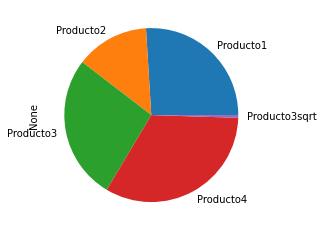

In [ ]:
#Un grafico de tortas utilizando el metodo .plot()
df.apply(np.sum, axis=0).plot(kind='pie')

<p><a name="agrupacion"></a></p>

## 1.7. Agrupando dataframes
El comando `groupby` permite agrupar y generar calculos y operaciónes sobre los valores agrupados.

In [ ]:
#Creamos la variable month para cada fecha en nuestro dataframe
df["month"] = [i.month for i in df.index]
df.head()


,Producto1,Producto2,Producto3,Producto4,Producto3sqrt,month
Fecha,,,,,,
2009-01-01,29,20,35,2576.359551,5.916080,1
2009-02-01,19,3,22,2576.359551,4.690416,2
2009-03-01,24,12,22,2576.359551,4.690416,3
2009-04-01,24,8,15,2576.359551,3.872983,4
2009-05-01,120,111,141,2576.359551,11.874342,5


In [ ]:
#Hacemos una agrupacion por mes y encontramos el maximo valor
# para cada columna
df.groupby("month").max()

,Producto1,Producto2,Producto3,Producto4,Producto3sqrt
month,,,,,
1,5298,2796,5765,6939.0,75.927597
2,5451,2868,5517,7052.0,74.276510
3,5904,3523,5762,7194.0,75.907839
4,5278,3499,5327,5837.0,72.986300
5,6028,4120,5397,7121.0,73.464277
6,6320,3499,6047,5259.0,77.762459
7,6100,3825,5536,7219.0,74.404301
8,5452,2865,6379,7044.0,79.868642
9,6626,4227,6535,7575.0,80.839347


In [ ]:
#Apliquemos agrupaciones y funciones al siguiente
# dataframe de ejemplo
df2 = pd.DataFrame({"Person": ["John", "Myla", "Lewis", "John", "Myla", "Lewis", "John", "Myla"], "Age": [24, 55, 21, 24, 26, 43, 64, 55]})
df2.head(8)

,Person,Age
0,John,24
1,Myla,55
2,Lewis,21
3,John,24
4,Myla,26
5,Lewis,43
6,John,64
7,Myla,55


In [ ]:
# Agrupar por persona y aplicar "min" a "Age"
df2.groupby("Person").Age.agg("min")             



Person
John     24
Lewis    21
Myla     26
Name: Age, dtype: int64

In [ ]:
# Agrupar por persona y edad y aplicar "count" a "Age"
# El metodo agg nos permite asignar una funcion especifica a 
# a una columna especifica a traves de un
# diccionrio. Muy util para aplicar funciones distintas a columnas distintas
df2.groupby(["Person","Age"]).agg({"Age":"count"})

Age
Person Age     
John   24     2
       64     1
Lewis  21     1
       43     1
Myla   26     1
       55     2

In [ ]:
# frecuencia de las edades
df2['Age'].value_counts()


55    2
24    2
21    1
43    1
26    1
64    1
Name: Age, dtype: int64

<p><a name="renormalizacion"></a></p>

## 1.8. Normalización de datos
En algunos algoritmos de Machine Learning (ML) es importante tener los datos normalizados. Para ellos la función `scale` se encarga de normalizar los datos quedando con una media cercana a 0 y una desviación estandar de 1

In [ ]:
from sklearn import preprocessing

In [ ]:
scaled=preprocessing.scale(df[['Producto4', 'Producto3sqrt']])

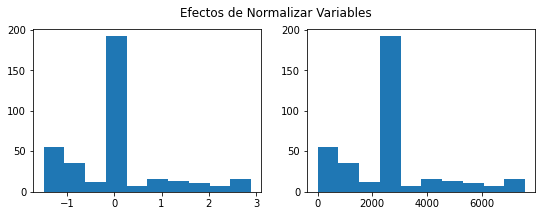

In [ ]:
import matplotlib.pyplot as plt
#Veamos como la variable Producto4 queda normaliza

plt.figure(figsize=(9, 3))
plt.subplot(121) #subplot(nrows, ncols, index)
plt.hist(scaled.T[0])
plt.subplot(122)
plt.hist(df.Producto4.values)
plt.suptitle('Efectos de Normalizar Variables')
plt.show()

In [ ]:
scaled.mean(axis=0)

array([-3.60367507e-16,  1.94669243e-16])

In [ ]:
scaled.std(axis=0)

array([1., 1.])

<p><a name="concom"></a></p>

## 1.9. Concatenación y combinación de dataframes

La concatenación se realiza mediante la función `concat()` y la combinación mediante la función `merge()`

In [ ]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

In [ ]:
# Concatenar por filas
all_data = pd.concat([data1, data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [ ]:
# Concatenar por columnas
all_data_col = pd.concat([data1, data2], axis = 1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [ ]:
# Combinar all_data y data3 a lo largo del valor de subject_id
pd.merge(all_data, data3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [ ]:
# Combinar solo los datos que tienen el mismo 'subject_id' en data1 y data2 (interseccion)
pd.merge(data1, data2, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [ ]:
# Combinar solo los datos que tienen el mismo 'subject_id' en data1 y data2 (union)
pd.merge(data1, data2, on='subject_id', how='outer')



,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


### Ayuda visual para combinar DataFrames


<p><img alt="comparison  logo" width="450" height="380" src="https://www.dofactory.com/Images/sql/sql-joins.png" align="center" hspace="10px" vspace="0px"></p>





<p><a name="case"></a></p>

# 2.0 Caso Integrador Pandas

**Contexto de negocio** Usted es un analista de energéticas .Se le acaba de asignar un  analisis relacionado con el volumen de negociacion y la volatilidad de las siguientes acciones del sector energy:

1. Dominion Energy Inc. (Stock Symbol: D)
2. Exelon Corp. (Stock Symbol: EXC)
3. NextEra Energy Inc. (Stock Symbol: NEE)
4. Southern Co. (Stock Symbol: SO)
5. Duke Energy Corp. (Stock Symbol: DUK)

Especificamente, quiere analizar los retornos diarios y la volatilidad de cada activo ademas de un mercado ampliado. 

Queremos saber ademas si los retornos potenciales compensan el riesgo de tomar posiciones en estos activos.

**Problema.** Basado en contexto anterior, surge la siguiente pregunta: **"¿Cuál es la relación entre la volatilidad y los retornos diarios para estos activos, además que relación existe entre los retornos diarios y el mercado ampliado?"**

In [ ]:
# Importamos las libretias necesarias para nuestro ejercicio aplicado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargue y visualizacion del dataframe
raw_df = pd.read_csv('https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/EnergyData.csv')
raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400.0,D
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100.0,D
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900.0,D
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900.0,D
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800.0,D


Determinemos primero si tenemos missing values. Para eso usamos el método de  ```pandas```  ```isnull()``` para ver si hay ```NaN``` en ```raw_df``` 

In [ ]:
# Veamos si hay valores faltantes (NaNs)
raw_df.isnull().sum()

Date          0
Open          2
High         14
Low           7
Close         7
Adj Close     7
Volume       22
Symbol        0
dtype: int64

Ahora que sabemos que tenemos valores faltantes. Usaremos el metodo ```mean()``` para determinar que porcentaje de la columna tiene información faltante.

In [ ]:
raw_df.isnull().mean()

Date         0.000000
Open         0.000319
High         0.002231
Low          0.001116
Close        0.001116
Adj Close    0.001116
Volume       0.003506
Symbol       0.000000
dtype: float64

Vemos que para cada columna la cantidad de datos faltantes nos supera el 5%

### Ejercicio 1:

No queremos información faltante para nuestro analisis. Cual de las siguientes opciones es la **menos recomendable** para proceder en este caso particular?

(a) LLenar los espacios vacíos con la información del día anterior

(b) Reeemplazar los espacios recolectando de nuevo los datos

(c) Estimar los espacios vacios interpolando a partir de la información disponible

(d) Remover las observaciones con espacios vacíos de nuestra base de datos

**Solución** (a). 

1. La opción b es válida pero costosa en recursos de tiempo y dinero.

2. La opción c es igualmente válida pero algo excesiva dado que faltan pocos datos en la base de datos.

3. En la práctica, se toma la decisión de remover las filas sin información solo cuando la cantidad de información faltante es muy pequeña. 

4. La opción a es problematica porque reemplazar un vacío con información del día anterior dada la variabilidad natural en precios y volumenes diarios de las acciones. 


In [ ]:
# Removamos los NA de la data al eliminar las filas que los contengan

progress_df = raw_df.dropna()

## 2.1. Estandarizando Fechas

Quisieramos analizar estas acciones juntas a traves del tiempo. Esa tarea requiere que todas las acciones contengan informacion para el mismo conjunto de fechas. Aseguremonos primero que este sea el caso. Para eso utilizaremos en este caso el método ```groupby``` para agrupar por  ```Date```, y luego usar el metodo  ```count()``` para enumerar cuantas fechas distintas tenemos. Dado que tenemos 1259 filas por ticker, deberiamos tener un conteo total de 1259 por ticker.

In [ ]:
# Cuantas filas con data tenemos para cada acción
progress_df.groupby('Symbol').count()

,Date,Open,High,Low,Close,Adj Close,Volume
Symbol,,,,,,,
D,1230,1230,1230,1230,1230,1230,1230
DUK,1249,1249,1249,1249,1249,1249,1249
EXC,1239,1239,1239,1239,1239,1239,1239
NEE,1251,1251,1251,1251,1251,1251,1251
SO,1259,1259,1259,1259,1259,1259,1259


In [ ]:

raw_df.isnull().sum()

Date          0
Open          2
High         14
Low           7
Close         7
Adj Close     7
Volume       22
Symbol        0
dtype: int64

Vemos diferentes conjuntos de fechas para los diferentes tickers. Queremos que todos los simbolos tengan el mismo conjunto de fechas para nuestro proposito. Nuestra estrategia será crear un  ```clean_df``` que corresponda a un dataframe con las mismas fechas para cada ```Symbol```:

In [ ]:
# Utilizamos el metodo set que elimina duplicados de objetos iterables
set_dates_D = set(progress_df[progress_df['Symbol'] == 'D']['Date'])

set_dates_EXC = set(progress_df[progress_df['Symbol'] == 'EXC']['Date'])

set_dates_NEE = set(progress_df[progress_df['Symbol'] == 'NEE']['Date'])

set_dates_SO = set(progress_df[progress_df['Symbol'] == 'SO']['Date'])

set_dates_DUK = set(progress_df[progress_df['Symbol'] == 'DUK']['Date'])


# Del metodo set utilizamos la funcion intersection que nos deja solo los elementos comunes
# de los conjuntos ingresados como argumentos
set_unique_dates = set.intersection(set_dates_D,set_dates_EXC,set_dates_NEE,set_dates_SO,set_dates_DUK)

In [ ]:
# Filtramos las fechas que estan presentes en todos los tickers 
clean_df = progress_df[progress_df['Date'].isin(set_unique_dates)].copy()

In [ ]:
# Veamos como queda
clean_df.groupby('Symbol').count()

,Date,Open,High,Low,Close,Adj Close,Volume
Symbol,,,,,,,
D,1192,1192,1192,1192,1192,1192,1192
DUK,1192,1192,1192,1192,1192,1192,1192
EXC,1192,1192,1192,1192,1192,1192,1192
NEE,1192,1192,1192,1192,1192,1192,1192
SO,1192,1192,1192,1192,1192,1192,1192


### Ejercicio 2:

Escriba una verificacion breve para determinar que cada accion tenga las mismas fechas que las demas. . (Pista: use el metodo ```set()```)

In [ ]:
#Desarrolle aqui el ejercicio


De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución
check_set_dates_D = set(clean_df[clean_df['Symbol'] == 'D']['Date'])
check_set_dates_EXC = set(clean_df[clean_df['Symbol'] == 'EXC']['Date'])
check_set_dates_NEE = set(clean_df[clean_df['Symbol'] == 'NEE']['Date'])
check_set_dates_SO = set(clean_df[clean_df['Symbol'] == 'SO']['Date'])
check_set_dates_DUK = set(clean_df[clean_df['Symbol'] == 'DUK']['Date'])

print(check_set_dates_D == check_set_dates_EXC)
print(check_set_dates_D == check_set_dates_NEE)
print(check_set_dates_D == check_set_dates_SO)
print(check_set_dates_D == check_set_dates_DUK)

--->

## 2.2. Variables adicionales requeridas para nuestro análisis

Hay dos variables de interés para nuestro análisis

1. Retorno diario (Precio de apertura contra precio de cierre) 
2. Volatilidad de los retornos diarios

¿Por qué son importantes?

1. Volatilidad: Nos da información del movimiento de los precios, es una medida directamente relacionada con el nivel de riesgo asociado al poseer una acción. 
2. Retorno: Nos da la rentabilidad por poseer el activo en un periodo de tiempo.

Calculemos estos valores y añadamoslos al dataframe ```clean_df```:

In [ ]:
#Calculemos una medida de volatilidad
clean_df['VolStat'] = (clean_df['High'] - clean_df['Low']) / clean_df['Open']

#Calculamos el retorno
clean_df['Return'] = (clean_df['Close'] / clean_df['Open']) - 1.0

#Expresamos el volumen en millones
clean_df['Volume_Millions'] = clean_df['Volume'] / 1000000.0 
clean_df.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,VolStat,Return,Volume_Millions,cum_ret,gross_ret,cumret,cumret2,cumret3
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400.0,D,0.018781,0.016201,1.8064,0.016201,1.016201,1.016201,1.016201,1.016201
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100.0,D,0.014858,-0.010471,2.2311,0.005560,0.989529,2.005729,0.989529,0.989529
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900.0,D,0.032286,-0.014714,2.5889,-0.009236,0.985286,2.991015,0.985286,0.985286
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900.0,D,0.018505,-0.014425,3.2669,-0.023528,0.985575,3.976590,0.985575,0.985575
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800.0,D,0.017674,0.003861,2.6018,-0.019758,1.003861,4.980452,1.003861,1.003861


In [ ]:
import plotly.express as px


fig = px.line(clean_df, x="Date", y="Volume", color='Symbol')
fig.show()

Dado que queremos analizar la relación existente entre la volatilidad diaria y los retornos, crearemos una columna adicional con la etiqueta   ```True``` cuando el retorno diario es positivo y ```False``` cuando el retorno diario sea negativo. Con estas etiquetas (labels) podemos agrupar los dias en cohortes de retornos positivos y retornos negativos para comparar la volatilidad promedio de esos dias. Llamaremos a esta columna  ```ReturnFlag```.

Como tactica de programación usaremos el concepto de **anonymous function**; es decir, una función definida pero no nombrada:
```python
lambda arguments: expression
```

La palabra clave ```lambda``` le indica a  Python que estamos uilizando una función anónima . Luego, los ```arguments``` son los nombres dados a los argumentos. Pueden ser  una  ```x```, o una ```y```, o como deseemos llamarla. En este caso, usaremos el nombre  ```row``` para el argumento introducido ya que de hecho se va a tratar de una fila de nuestro dataframe. La ```expression``` es aquello que aplicamos a los  ```arguments```; es decir la función

Veamos como podemos utilizar la función anónima para crear la caracteristica ```ReturnFlag```:

In [ ]:
clean_df['ReturnFlag'] = clean_df.apply(lambda row: True if row['Return'] > 0 else False, axis=1) # Volume en Millones
clean_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,VolStat,Return,Volume_Millions,cum_ret,gross_ret,cumret,cumret2,cumret3,ReturnFlag
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400.0,D,0.018781,0.016201,1.8064,0.016201,1.016201,1.016201,1.016201,1.016201,True
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100.0,D,0.014858,-0.010471,2.2311,0.005560,0.989529,2.005729,0.989529,0.989529,False
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900.0,D,0.032286,-0.014714,2.5889,-0.009236,0.985286,2.991015,0.985286,0.985286,False
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900.0,D,0.018505,-0.014425,3.2669,-0.023528,0.985575,3.976590,0.985575,0.985575,False
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800.0,D,0.017674,0.003861,2.6018,-0.019758,1.003861,4.980452,1.003861,1.003861,True


Note que el método ```apply()``` toma una función anónima y la aplica a las filas del dataframe a través del segundo argumento  ```axis```. ```axis=0``` aplica la función a columnas, mientras que  ```axis=1``` la aplica a las filas.

¿Qué pasa entonces al interior de esta expresión?
```python
clean_df['ReturnFlag'] = clean_df.apply(lambda row: True if row['Return'] > 0 else False, axis=1)
```

1. ```pandas``` reconoce a través del método ```apply```  que esta operando sobre el dataframe ```clean_df``` DataFrame
2. El método  ```apply``` toma una función como input que será aplicada al dataframe  ```clean_df```
3. Dado que el segundo argumento de ```apply``` es ```axis=1``` el input en la función anónima es una fila individual.
4. El nuevo valor es almacenado en la columna  ```clean_df['ReturnFlag']```

### Ejercicio 3:
Usando ```apply()``` y ```lambda``` genere dos nuevas columnas llamadas **rally** y otra llamada **sellof**. Con valores ```True``` para la primera si retorno supera el 2% y ```False``` en caso contrario. La segunda con valores ```True``` si el retorno es menor al 2% con ```False``` en caso contrario

In [ ]:
#Desarrolle aqui el ejercicio



De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución

clean_df['rally'] = clean_df.apply(lambda row: True if row['Return'] > 0.02 else False, axis=1)

clean_df['selloff'] = clean_df.apply(lambda row: True if row['Return'] < -0.02 else False, axis=1)


--->

### Ejercicio 4:

Usando ```apply()``` y ```lambda```, escriba codigo para crear una nueva columna llamada  ```YYYY``` para el clean df```clean_df```, donde la nueva columna va a ser el año de la observacion en formato string. Por ejemplo, para la fila con  ```Date``` igual a 2014-07-28, el valor para nueva columna será '2014'. Recuerde el slicing de strings, puede acceder a los pimeros 4 caracteres de un string  ```my_string``` usando ```my_string[:4]```.

In [ ]:
#Desarrolle aqui el ejercicio


De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución

clean_df['YYYY'] = clean_df.apply(lambda row: row['Date'][:4], axis=1)


--->

In [ ]:
# One possible solution
clean_df['YYYY'] = clean_df.apply(lambda row: row['Date'][:4], axis=1)

### Ejercicio 5:
Usando ```apply()``` y ```lambda```, escriba el codigo para crear una nueva columna en el dataframe ```clean_df``` llamada ```AvgDailyPrice``` que calcule un precio promedio diario dado que el volumen supere los 5 millones o no. Calcule la nueva columna como (Open + High + Low + Close)/4 si el volumnes mayor a 5 millones, o como (High + Low + Close)/3  si el volumen es menor a 5 millones.

In [ ]:
#  Desarrolle aqui el ejercicio


De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución


clean_df['AvgDailyPrice'] = clean_df.apply(lambda row:(row['Open']+row['High']+row['Low']+row['Close'])/4 if row['Volume'] > 5000000 else (row['High']+row['Low']+row['Close'])/3, axis=1)
clean_df.head()


--->

## 2.3. Etiquetando regimenes de volatilidad

Nos gustaria etiquetar periodos en una categoria de volatilidad dentro de una nueva columna llamada ```VolLevel``` para acción usando un limite superior e inferior. Por ejemplo, para el  Symbol D nos gustaria una columna determinada así:

```python
if VolStrat > upper_threshold_dict['D']:
    VolLevel = '3_HIGH'
elif VolStrat < lower_threshold_dict['D']:
    VolLevel = '1_LOW'
else:
    VolLevel = '2_MEDIUM'
```

Veamos si a partir de esta estrategia de etiquetado podemos extraer mas información de nuestros datos

In [ ]:
# Determinado las cotas inferiores (Usando el 25avo percentil)
lower_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.25).to_dict() # limite 25avo percentil
lower_threshold_dict

{'D': 0.010240046986389077,
 'DUK': 0.010018315803797114,
 'EXC': 0.011881680089172456,
 'NEE': 0.010258642787424582,
 'SO': 0.009734019893739424}

In [ ]:
# Determinamos limites superiores (usando el 75avo percentil)
upper_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.75).to_dict() # limite 75avo percentil
upper_threshold_dict

{'D': 0.017960914526108228,
 'DUK': 0.017598380774085175,
 'EXC': 0.021801523265676366,
 'NEE': 0.01768021802425081,
 'SO': 0.016830447068579304}

Para lograr etiquetar periodos segun el regimen de volatilidad definiremos una nueva columna llamada ```VolLevel``` para cada accion utliznado los limites superiroes e inferiroes definidosfor each Symbol using some lower and upper bound values. Definiremos una funcion personalizada par alcanzar este objetivo

In [ ]:
# Nuestra funion personalizada, que recibe una fila de und ataframe agregado
# y retona un string sea LOW, MEDIUM, o HIGH
def funcion_personalizada(row):
    row_symbol = row['Symbol']    # el valor del Symbol en la fila value 
    row_volstat = row['VolStat']  # el valor del  VolStat  en la fila
    
    lower_threshold = lower_threshold_dict[row_symbol] # Dicccionario {string:float}
    upper_threshold = upper_threshold_dict[row_symbol] # Dicccionario  {string:float}
    
    # Sistema de decisiones de nuestra funcion
    if row_volstat > upper_threshold:
        return '3_HIGH'
    elif row_volstat < lower_threshold:
        return '1_LOW'
    else:
        return '2_MEDIUM'

In [ ]:
# Applicamos funcion_personalziada al dataframe de pandas fila por fila (axis=1)
clean_df['VolLevel'] = clean_df.apply(lambda row: funcion_personalizada(row), axis=1)
clean_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,VolStat,Return,Volume_Millions,ReturnFlag,rally,selloff,YYYY,AvgDailyPrice,VolLevel
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400.0,D,0.018781,0.016201,1.8064,True,False,False,2014,70.563332,3_HIGH
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100.0,D,0.014858,-0.010471,2.2311,False,False,False,2014,70.280001,2_MEDIUM
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900.0,D,0.032286,-0.014714,2.5889,False,False,False,2014,69.343336,3_HIGH
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900.0,D,0.018505,-0.014425,3.2669,False,False,False,2014,68.023333,3_HIGH
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800.0,D,0.017674,0.003861,2.6018,True,False,False,2014,67.740000,2_MEDIUM


### Ejercicio 6:

Usando el  ```clean_df``` y una funcion ```lambda``` al inerior de un ```apply()```, escriba una funcion ```nueva_funcion_personalizada()``` que genere una columna ```EnhancedVolLevel``` similar al anterior ejercicio, solo que en este caso se va a conatr con 5 categorias de volatilidad siguiendo esta logica: 

```python
if VolStrat > 90th percentile:
    VolLevel = '5_VERY_HIGH'
elif VolStrat > 75th percentile:
    VolLevel = '4_HIGH'
elif VolStrat > 25th percentile:
    VolLevel = '3_MEDIUM'
elif VolStrat > 10th percentile:
    VolLevel = '2_LOW'
else:
    VolLevel = '1_VERY_LOW'
```

Use estas nuevas categoria para determinar si existen patrones entre volatilidad y el sentido de los retornos, para hacer eso use la siguiente linea de codigo:

```python
clean_df.groupby(['Symbol','EnhancedVolLevel'])['ReturnFlag'].mean()
```

In [ ]:
#Desarrolle aqui el ejercicio

De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución

def new_custom_function(row):
    row_symbol = row['Symbol']    # the Symbol value in the row
    row_volstat = row['VolStat']  # the VolStat value in the row
    
    very_lower_threshold = very_lower_threshold_dict[row_symbol] # Dictionary of {string:float}
    lower_threshold = lower_threshold_dict[row_symbol] # Dictionary of {string:float}
    upper_threshold = upper_threshold_dict[row_symbol] # Dictionary of {string:float}
    very_upper_threshold = very_upper_threshold_dict[row_symbol] # Dictionary of {string:float}
    
    # The function decision, return value depending on very low, low, medium, high, or very high volatility
    if row_volstat > very_upper_threshold:
        return '5_VERY_HIGH'
    elif row_volstat > upper_threshold:
        return '4_HIGH'
    elif row_volstat > lower_threshold:
        return '3_MEDIUM'
    elif row_volstat > very_lower_threshold:
        return '2_LOW'
    else:
        return '1_VERY_LOW'

    
very_upper_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.90).to_dict() # 90th percentile bound
upper_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.75).to_dict() # 75th percentile bound
lower_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.25).to_dict() # 25th percentile bound
very_lower_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.10).to_dict() # 10th percentile bound


# Calculo y adicion de una nueva columna
clean_df['EnhancedVolLevel'] = clean_df.apply(lambda row: new_custom_function(row), axis=1)
print(clean_df.head())

# Resultado
print("--------------------------------")
clean_df.groupby(['Symbol','EnhancedVolLevel'])['ReturnFlag'].mean()


--->


Podemos concluir que los activos de nuestra base de datos no muestran patrones significativos en terminos de direccion promedio de los retornos bajo distintos regimenes de volatilidad

## Comparando los retornos contra un mercado ampliado

¿Cómo se comparan los retornos de estas 5 acciones contra un mercado accionario ampliado? Para esta pregunta haremos uso del indice  S&P 500, un indice accionario compuesto por las 500 acciones enlistas de mayor capitalizacion en los Estados Unidos. El indice es utilizado de forma regular como represtnacion del mercado accionario de los Estados Unidos. Si podemos determinar la existencia o no de una relacion significativa entre nuestras 5 acciones y el S&P 500 podremos decir que existen caracterisiticas idiosincraticas del sector energetico al interior del mercado accioanrio.


Carguemos la data del SP y añadamosla al dataframe limpio con el que veniamos trabajando:

In [ ]:
# Carguemos la informacion del ETF del SP500
market_df = pd.read_csv('https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/SPY.csv')

In [ ]:
market_df['Symbol'] = 'SPY' # añadimos la columna de Symbol
market_df['Return'] = (market_df['Close'] / market_df['Open']) - 1.0 # Calculamos los retornos
market_df['VolStat'] = (market_df['High'] - market_df['Low']) / market_df['Open']
market_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Return,VolStat
0,2014-08-18,196.800003,197.449997,196.690002,197.360001,178.729111,75424000,SPY,0.002846,0.003862
1,2014-08-19,197.839996,198.539993,197.440002,198.389999,179.661896,59135000,SPY,0.002780,0.005560
2,2014-08-20,198.119995,199.160004,198.080002,198.919998,180.141846,72763000,SPY,0.004038,0.005451
3,2014-08-21,199.089996,199.759995,198.929993,199.500000,180.667160,67791000,SPY,0.002059,0.004169
4,2014-08-22,199.339996,199.690002,198.740005,199.190002,180.386368,76107000,SPY,-0.000752,0.004766


### Ejercicio 7:

Usando ```market_df``` y ```clean_df``` cree un nuevo DataFrame ```modified_clean_df``` que no es otra cosa que el  ```clean_df``` con la columna del retorno mensual del SPY```MeanMonthSPYReturn```.

Para aquellos familiarizados con SQL, el merging y joining de DataFrames puede ser ejecutado en python mas o menos igual que en SQL. En este caso usaremos la interseccion de fechas entre  clean_df y market_df 

 Asi cada entrada en la nueva columna deberia ser el retorno mensual del SPY para el mes dado por la columna ```Date```. La primera y ultima fila del resutado  de ```modified_clean_df``` deberian producir los siguientes  outputs de head(1) y tail(1):
```python
print(modified_clean_df[['Date','Symbol','YYYYMM','MeanMonthSPYReturn']].head(1))
```

                 Date       Symbol YYYYMM MeanMonthSPYReturn
                 2014-08-01 D      201408 0.001443

```python
print(modified_clean_df[['Date','Symbol','YYYYMM','MeanMonthSPYReturn']].tail(1))
```
                 Date       Symbol YYYYMM MeanMonthSPYReturn
                 2019-07-26 DUK    201907 0.000167


De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución


# Añadimos YYYYMM a market_df y clean_df
market_df['YYYYMM'] = market_df.apply(lambda row: row['Date'][:4] + row['Date'][5:7], axis=1)
clean_df['YYYYMM'] = clean_df.apply(lambda row: row['Date'][:4] + row['Date'][5:7], axis=1)

# Calculamos un market_df_modificado para SPY
modified_market_df = market_df.groupby(['Symbol','YYYYMM']).mean().reset_index()
modified_market_df = modified_market_df.rename(columns={'Return':'MeanMonthSPYReturn'}) # rename column

# Hacemos un merge interno en la columna YYYYMM
modified_clean_df = pd.merge(clean_df, modified_market_df[['YYYYMM','MeanMonthSPYReturn']], how='inner', on='YYYYMM')

# Imprimimos resultados
print(modified_clean_df[['Date','Symbol','YYYYMM','MeanMonthSPYReturn']].head(1))
print(modified_clean_df[['Date','Symbol','YYYYMM','MeanMonthSPYReturn']].tail(1))

--->

<p><a name="models"></a></p>

# 3.0 Estadistica Descriptiva

El analisis estadisitcio proporciona un poderoso conjunto de herramientas para analizar y extraer conclusiones de cualquier colección de datos. El primer conjunto de metodos que vamos a estudiar se conoce como **Estadistica Descriptiva**, la cual se encarga de estudiar como resumir de forma efectiva un conjunto de datos para describir los aspectos mas importantes de datos para obtener inforamción. 

## 3.1 Medidas de tendencia central

### 3.1.1  Media muestral (Promedio)

Tambien conocida como el promedio aritmetico es una medida de tendencia central con las siguientes propiedades.

$\bar{x}=\frac{\sum_{i=1}^{n}x_{i}}{n}=\frac{x_{1}+x_{2}+..+x_{n}}{n}$


1. La suma de las desviaciones con respecto a $\bar{x}$ es igual cero.
La media es el centro de gravedad de la distribución de la variable. La media muestral es donde el diagrama de puntos se equilibra 

<p><img alt="comparison  logo" width="750" height="280" src="https://files.realpython.com/media/py-stats-01.3254dbfe6b9a.png"
" align="center" hspace="10px" vspace="0px"></p>

2. Si a todos los valores de la variable se le suma una misma cantidad, la media aritmética queda aumentada en dicha cantidad.

3. La media aritmética está comprendida entre el valor máximo y el valor mínimo del conjunto de datos

4. Si se efectúa un cambio de unidad de medida a los datos (por ejemplo de metros a centímetros), la media queda afectada por dicho cambio de escala.

5. La media está influenciada por los valores de cada uno de los datos (sensible a datos extremos "outliers")


In [ ]:
# Media a partir de una lista usando las funciones por default de
# sum() y len()
x=[10,19,40, 7,22,25]
mean = sum(x) / len(x)
print("Media Aritmetia de x: ", mean)

Media Aritmetia de x:  20.5


In [ ]:
# Media a partir de una lista usando numpy
import numpy as np
mean_np = np.mean(x)
mean_np

20.5

In [ ]:
# Media a partir de una lista usando numpy ignorando nan
import numpy as np
mean_np=np.nanmean(x)
mean_np

20.5

In [ ]:
# Media a partir de un objeto pd.Series usando el método mean() 
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/ventas.csv") 
mean=df["Producto1"].mean()
print(mean)

2032.2


### Ejercicio 8

Muestre un ejemplo a través de código de las propiedades **1**, **2** y **3** de las medias aritmeticas

In [ ]:
# Desarrolle aqui su ejercicio



De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución



x=[10,19,40, 22, 54, 46, 33]

#Propiedad 1
sum_desv=0
x_bar=np.mean(x)
for i in x:
  sum_desv=sum_desv+(i-x_bar)
 
print("Suma de desviaciones: ", sum_desv)  

#Propiedad 2 
y=np.array([100, 133,  88, 32,22, 56])
mean_y=np.mean(y)
c_mas_y=y+3
mean_c_mas_y=np.mean(c_mas_y)
print("Media original: ",mean_y,"Media modificada: ",mean_c_mas_y)

#Propiedad 3
y=np.array([100, 133,  88, 32,22, 56])
if np.mean(y)<np.max(y) and np.mean(y)>np.min(y):
  print("Se cumple")
else:
  print("S*t happens")  

--->

### 3.1.2  Media Ponderada (Promedio Ponderado)

Medida de tendencia central apropiada cuando en un conjunto de datos cada uno de ellos tiene una importancia relativa (o peso) respecto de los demás datos. Se obtiene multiplicando cada uno de los datos por su ponderación (peso) para luego sumarlos, obteniendo así una suma ponderada; después se divide esta entre la suma de los pesos.

$\bar{x}=\frac{\sum_{i=1}^{n}w_{i}x_{i}}{n}=\frac{w_{1}x_{1}+w_{2}x_{2}+..+w_{n}x_{n}}{w_{1}+w_{2}+..+w_{n}}$




In [ ]:
#Media ponderada usando listas
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
wmean

6.95

In [ ]:
#Media ponderada usando numpy y objetos pd.SERIES
y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean = np.average(y, weights=w)
print("Media de numpy array:", y)

wmean = np.average(z, weights=w)
print("Media de pd.Series:", y)

Media de numpy array: [ 8.   1.   2.5  4.  28. ]
Media de pd.Series: [ 8.   1.   2.5  4.  28. ]


### Ejercicio 9

Calcule el retorno YTD de un portafolio con los activos A, B y C si sus pesos respectivos son 30%, 45% y 25% y los retornos YTD son 1%, 2% y -3% respectivamente

In [ ]:
#Desarrolle aqui el ejercicio
retornos=np.array([0.01, 0.02, -0.03])
pesos=np.array([0.3, 0.45, 0.25])
rp = np.average(retornos, weights=pesos)
print("retorno de portaoflio: " ,rp)

retorno de portaoflio:  0.0045000000000000005


De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución
retornos=np.array([0.01, 0.02, -0.03])
pesos=np.array([0.3, 0.45, 0.25])
rp = np.average(retornos, weights=pesos)
print("retorno de portaoflio: " ,)

--->

### 3.1.3  Media Geometrica 
Generalmente utilizada para promediar tasas de cambio en el tiempo o para calcular el crecimiento de una variable. En finanzas, se usa comunmente para promediar una serie de retornos. Debido a la desigualdad de Jensen, la media geometrica siempre es menor o igual que la media aritmetica, de hecho, esta distancia entre ambas medias aumenta a medida que los datos tienen mayor variabilidad entre ellos.



$ G=\sqrt[n]{x_{1}x_{2}x_{3}..x_{n}}$

<p><img alt="comparison  logo" width="750" height="280" src="https://files.realpython.com/media/py-stats-02.ec1ca0f9a9ac.png"
" align="center" hspace="10px" vspace="0px"></p>

In [ ]:
#Media geometrica usando listas
x = [8.0, 1, 2.5, 4, 28.0]
gmean = 1
for item in x:
  gmean *= item
gmean **= 1 / len(x)
gmean

4.677885674856041

In [ ]:
#Media geometrica utilizando scipy
from scipy import stats
scipy.stats.gmean(x)

4.67788567485604

### 3.1.3  Mediana
La mediana de un conjunto de números es el número medio en el conjunto (después que los números han sido arreglados del menor al mayor) -- o, si hay un número par de datos, la mediana es el promedio de los dos números medios.

La mediana tiene la particularidad de no ser sensible a los valores extremos como si pasa con la media

In [ ]:
# Mediana calculada con numpy
x = [8.0, 1, 2.5, 4, 10]
median = np.median(x)
print(median)

4.0


### 3.1.3  Moda
Es el valor con mayor frecuencia en una de las distribuciones de datos, esta medida de tendnecia central es apropiada pra trabajar con variables categoricas o con variables numericas discretas

In [ ]:

x = ["alto", "medio", "bajo", "medio", "alto","alto"]
mode_ = scipy.stats.mode(x)
mode_

NameError: ignored

## 3.2 Medidas de dispersión

Definimos como **dispersión** a la variabilidad alrededor de la tendencia central. nos enfocaremos en medidas de disersion absoluta, es decir, una medida de variabilidad presente sin comparacion a algun punto de referencia o benchmark.  

### 3.2.1  Varianza Muestral
Es una medida de dispersión calculada como el promedio de las desviaciones cuadráticas respecto de la media. Es decir, calcula que tan dispersos estan numericament las observaciones de la media.

 $S^{2}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}}{n}
$

- La varianza tiene como valor mínimo 0
- Es posible que dos muestras compartan media y mediana pero tengan varianza completamente distintas entre sí. He ahí la utilidad de contar este tipo de medidas.

In [ ]:
# Calculando la varianza con listas
x = [8.0, 1, 2.5, 4, 10,33,98, 57, 39, 93,120,32,21,19]
n = len(x)
mean_ = sum(x) / n
var = sum([(item - mean_)**2 for item in x]) / (n-1)
var

1529.9299450549454

In [ ]:
# Calculando la varianza con numpy
import numpy as np
x = [8.0, 1, 2.5, 4, 10,33,98, 57, 39, 93,120,32,21,19]
var_np = np.var(x,ddof=1)
var_np

1529.9299450549452

In [ ]:
# Calculando la varianza para un objeto pd.Series
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/ventas.csv") 
var_pandas=df["Producto1"].var(ddof=1)
print(var_pandas)


3530189.297802198


### 3.2.2  Desviación Estandár
Medida calculada como la raiz cuadrada de la varianza utilizada para cuantificar  la dispersión de un conjunto de datos numéricos.

- Una desviación estándar baja indica que la mayor parte de los datos  tienden a estar agrupados cerca de su media.

- Una desviación estándar alta indica que los datos se extienden sobre un rango de valores más amplios.

In [1]:
#Calculando la desviacion estandar utilizando numpy
import numpy as np
y = [8.0, 1, 2.5, 4, 10,33,98, 57, 39, 93,120,32,21,19]
np.std(y, ddof=1)

39.11431892612915

In [2]:
# Calculando la varianza para un objeto pd.Series
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/ventas.csv") 
std_pandas=df["Producto1"].std(ddof=1)
print(std_pandas)


1878.8797986572208


### 3.2.3 Sesgo Muestral   (skewness)


La siguiente figura nos muestra dos conjuntos de datos asimetricos. 

El conjunto represenado por los puntos verdes evidencia un sesgo negativo indicando una cola dominante en la izquierda. Un sesgo positivo corresponde a colas mas pesadas al lado derecho, lo cual puede verse en los puntos blancos. 

- Valores negativos del sesgo correspondenden a colas pesadas a la izquierda. 

- Valores positivos del sesgo correspondenden a colas pesadas a la derecha. 

- Si el sesgo se ubica en vlaores cercanos a cero  entonces se considera que el conjunto de datos analizado es simetrico. 

<p><img alt="comparison  logo" width="750" height="280" src="https://files.realpython.com/media/py-stats-07.92abf9f362b0.png"
" align="center" hspace="10px" vspace="0px"></p>



In [5]:
# Calculando el sesgo utilizando scipy 
from scipy import stats
import scipy
y = [8.0, 1, 2.5, 4, 10,33,98, 57, 39, 93,120,32,21,19-1,-3,-4,-7,-100]
scipy.stats.skew(y)

-0.15111045967164807

In [6]:
# Calculando el sesgo para un objeto pd.Series
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/ventas.csv") 
skew_pandas=df["Producto1"].skew()
print(skew_pandas)


0.5460114096154275


### 3.2.3 Curtosis   
La curtosis es una medida del peso combinado de las colas de una distribucion relativo al resto de la distribución,es decir, la proprocion de la probabilidad que se ubica en las colas..

- Una distribucion con colas mas pesadas que la distribucipn normal se llama leptocúrtica. (Mayor probabilidad de valores extremos Curtosis > 3) 
- Una distribución con colas mas livianas se llama platicúrtica. (Curtosis < 3)
- Finalmente aquellas distribuciones idénticas a la normal en lo que corresponde al peso de sus colas se denomina mesocúrtica. (Curtosis $\sim$ 3)

<p><img alt="comparison  logo" width="600" height="300" src="https://www.maa.org/sites/default/files/images/upload_library/19/NormalCaucy.png"
" align="center" hspace="10px" vspace="0px"></p>


In [11]:
# Usando scipy para calcular curtosis
from scipy.stats import kurtosis
# Generemos un nmpy array con 10000 observaciones a partir de una distribucion normal
mu=0
sigma=1
s = np.random.normal(mu, sigma, 10000)
print(kurtosis(s,fisher=False))

3.016427218481671


<p><a name="models"></a></p>

# 4.0 Modelos y Conceptos

Veamos algunas aplicaciones y conceptos interesantes desarrollados en python


### 4.1 Cadenas de Markov

En la teoría de la probabilidad, se conoce como cadena de Márkov o modelo de Márkov a un tipo especial de **proceso estocástico discreto** en el que la probabilidad de que ocurra un evento depende solamente del **evento inmediatamente anterior**.​ Esta característica de falta de memoria recibe el nombre de propiedad de Markov.

Las cadenas de Markov y sus respectivos diagramas pueden ser usados para modelar las probabilidades de ciertos climas financieros y asi predecir la propension de condiciones futuras de mercado.


Para este ejercicio consideramos 3:

- **Bullish markets**: periodos de tiempo donde los precios de los activos suben con una sensación optimista de los agentes hacia el futuro. 
- **Bearish markets**: periodos de tiempo donde los precios de los activos bajan con una visión pesimista del futuro.
- **Stagnant markets**: el mercado se comporta flat.


En los mercados justos se asume que la información está diponible para todos y la fluctuación de precios obedece a aleatoriedad completamente.

Consideremos un mercado hipotético con propiedades markovianas con los siguienes patrones de comportamiento empiricos:

1. Después de una semana bullish hay 90% de chance de que la siguiente semana tambien sea bullish.
Adicionalmete, hay  7.5% de chance de que a una semana bullish la siga un bearish y solo  un 2.5%
de probabilidad de que sea una semana stagnant. 

2. Despues de una semana bearish hay 80% de chance de que la semana siguiente tambien lo sea. Adicionalmete, hay  15% de chance de que a una semana bearish la siga una bullish y solo  un 5% de probabilidad de que sea una semana stagnant.


3. Despues de una semana stagnant hay un 50% de chance de que la semana siguiente tambien lo sea. Adicionalmete, hay  25% de chance de que a una semana stagnant la siga ya sea una semana  bullish o una bearish  .

Al compilar esta informacion obtenemos la matriz de transicion M:

| De/A     	| Bullish 	| Bearish 	| Stagnant 	|
|----------	|---------	|---------	|----------	|
| Bullish  	| 0.9     	| 0.075   	| 0.025    	|
| Bearish  	| 0.15    	| 0.8     	| 0.05     	|
| Stagnant 	| 0.25    	| 0.25    	| 0.5      	|

Veamos una implementacion en python de una cadena de markov para el ejemplo de los 3 estados del mercado

In [ ]:
import numpy as np

class MarkovChain():
  def __init__(self,transition_matrix,states):
    """
    """
    self.transition_matrix= np.atleast_2d(transition_matrix)
    self.states=states
    self.index_dict={self.states[index]: index for index in range(len(self.states))}
    self.state_dict={index:self.states[index]  for index in range(len(self.states))}
  def next_state(self, current_state):
    """
    """
    
    return np.random.choice(self.states,p=self.transition_matrix[self.index_dict[current_state],:])

  def generate_states(self,current_state,no=10):
    """
    """
    future_states=[]
    for i in range(no):
      next_state = self.next_state(current_state)
      future_states.append(next_state)
    return future_states  
  


In [ ]:
#Definimos nuestra matriz de transicion
transition_matrix=[[0.9, 0.075 ,0.025],
                   [0.15, 0.8  ,0.05],
                   [0.25, 0.25  ,0.5]]

#Instanciamos nuestra cadena_mercado como un objeto de clase MarkovChain
cadena_mercado=MarkovChain(transition_matrix=transition_matrix, states=["Bullish","Bearish","Stagnant"])

#Ejecutemos un paso para ver si estamos hoy en una semana bullish, en que semana 
# estado podriamos estar la proxima semana
cadena_mercado.next_state(current_state="Bullish")    

'Bullish'

In [ ]:
#Hagamos una simulación de 10 semanas empezando con una semana stagnant
n_sim=10
cadena_mercado1=MarkovChain(transition_matrix=transition_matrix, states=["Bullish","Bearish","Stagnant"])
simulacion1=cadena_mercado1.generate_states(current_state="Stagnant",no=n_sim)  
print("Realizacion de una simulación para 10 semanas")
print(simulacion1)


Realizacion de una simulacion para 10 semanas
['Stagnant', 'Stagnant', 'Stagnant', 'Stagnant', 'Bullish', 'Stagnant', 'Bullish', 'Bearish', 'Stagnant', 'Bearish']


## 4.2. Ley de los grandes números (La maldición del jugador o La Casa siempre gana)

La ley de los grandes números señala que a medida que el número de observaciones o intentos aumenta, la probabilidad observada se acerca al valor esperado (teórico)
Esto significa que a medida que la **muestra** crece, el promedio de la muestra se acerca a la media de la población total.

$$ \lim_{x \rightarrow \infty } P\left ( \left | \bar{X} - \mu \right | < \varepsilon \right )=1 $$

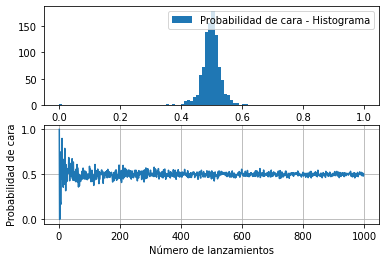

In [ ]:
import matplotlib.pyplot as plt
import random 

n=1
prob=[]
flip=[]

while n<1000:
    cara=0
    sello=0

    for i in range(n):
        if random.randint(0,1)==0:
            cara+=1
        else:
            sello+=1
    # k= eventos de cara / eventos totales         
    k=cara/(cara+sello)
    prob.append(k)
    flip.append(n)
    n+=1

plt.subplot(2,1,1)
plt.hist(prob,100,label='Probabilidad de cara - Histograma')
plt.legend()


plt.subplot(2,1,2)
plt.plot(flip,prob)
plt.xlabel('Número de lanzamientos')
plt.ylabel('Probabilidad de cara')
plt.grid(True)

plt.show()

## 4.3. Simulación de Montecarlo
Podemos definir la simulacion de montecarlo como ​ es un método no determinista o estadístico numérico que sirve para aproximar expresiones matemáticas complejas y costosas de evaluar con exactitud. Su nombre es una referencia al casino de Montecarlo en Mónaco. Veamos un aplicación:

<p><img alt="comparison  logo" width="300" height="300" src="http://teachingmath.info/circsq.jpg"
" align="center" hspace="10px" vspace="0px"></p>

Suponga un circulo de radio $r$ perfectamente introducido en un cuadrado de lado $2r$, asi tendriamos que:

- Area del circulo $\pi r^{2}$
- Area del cuadrado $4 r^{2}$
- Distancia dos puntos: $d=\sqrt{\left ( x_{1}-x_{2} \right )^{2}+\left ( y_{1}-y_{2} \right )^{2}}$
- La razon circulo/ cuadrado de las areas sería:

    $ \frac{\pi r^{2}}{4 r^{2}}=\frac{\pi}{4}$

Use una estrategia de generacion de puntos aleatorios para calcular $\pi$





In [15]:
import math
import random

### Calculadorea de distancia euclideana
def dist_cal (x1, y1 ,x2, y2):
    distance = math.sqrt((x1 - x2)**2 + (y1 -y2)**2) 
    return distance

#Generador de numeros aleatorios (x,y)
def create_random(n_val):
    point_list = []
    for x in range(n_val):
        # El radio de nuestro circulo mide 10000
        x = random.randint(-10000,10000)
        y = random.randint(-10000,10000)
        
        point_list.append([x,y])
    return point_list    



In [22]:
adentro = 0
fuera = 0
n_valores = 999

points = create_random(n_valores)
  
for i in points:
  if dist_cal(i[0],i[1], 0,0) <= 10000:
    adentro = adentro +1
  
  
  
print ("Ratio circulo" , (adentro / (n_valores)))
print("Estimación de pi  ", 4*(adentro / (n_valores)))

Ratio circulo 0.7827827827827828
Estimación de pi   3.131131131131131


## 4.4 Caminatas Aleatorias

Proceso estocástico que representa una sucesion de pasos de forma aleatoria. Este concepto senta las bases de lo que se conoce como movimiento browniano.

In [24]:
%pylab inline
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


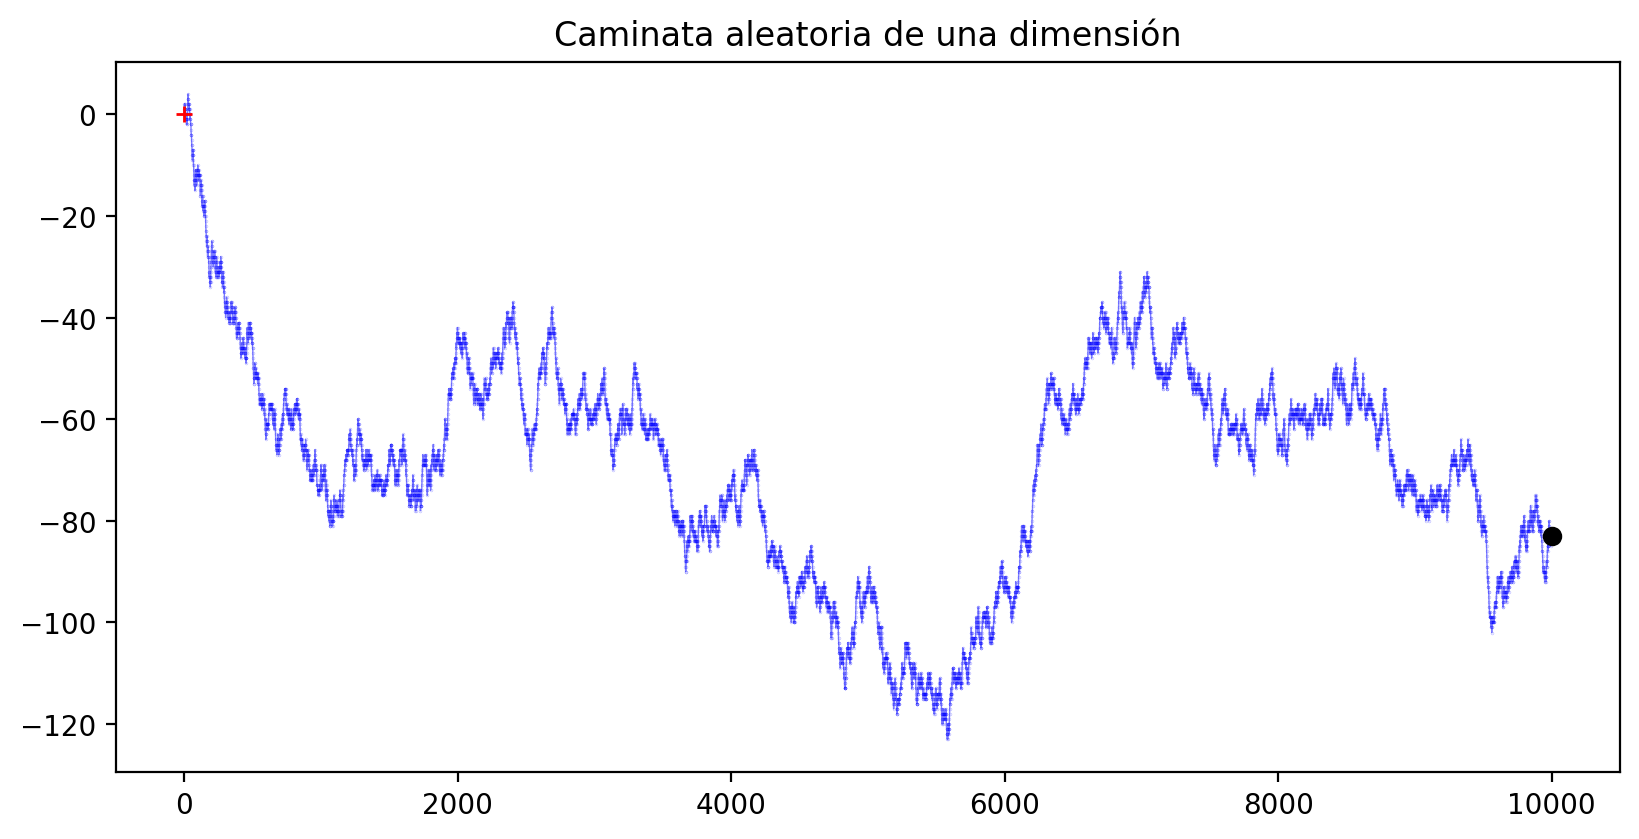

In [31]:
# Definamos los parametros de nuestra caminata aleatoria

#Numero de dimensiones
dims = 1
#Numero de pasos
step_n = 10000
# Conjunto de decision de los pasos (Como seria esto en el caso de un browniano?)
step_set = [-1, 0, 1]

#Punto de origen
origin = np.zeros((1,dims))

# Simulacion 
step_shape = (step_n,dims)

#Utilizamos el metodo random.choice para dar pasos
steps = np.random.choice(a=step_set, size=step_shape)

#Concatenamos y sumamos cada paso para poder "avanzar"
path = np.concatenate([origin, steps]).cumsum(0)

start = path[:1]
stop = path[-1:]
# Graficamos el recorrido
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(np.arange(step_n+1), path, c='blue',alpha=0.25,s=0.05);
ax.plot(path,c='blue',alpha=0.5,lw=0.5);
ax.plot(0, start, c='red', marker='+')
ax.plot(step_n, stop, c='black', marker='o')
plt.title('Caminata aleatoria de una dimensión')
plt.tight_layout(pad=0)
plt.show()

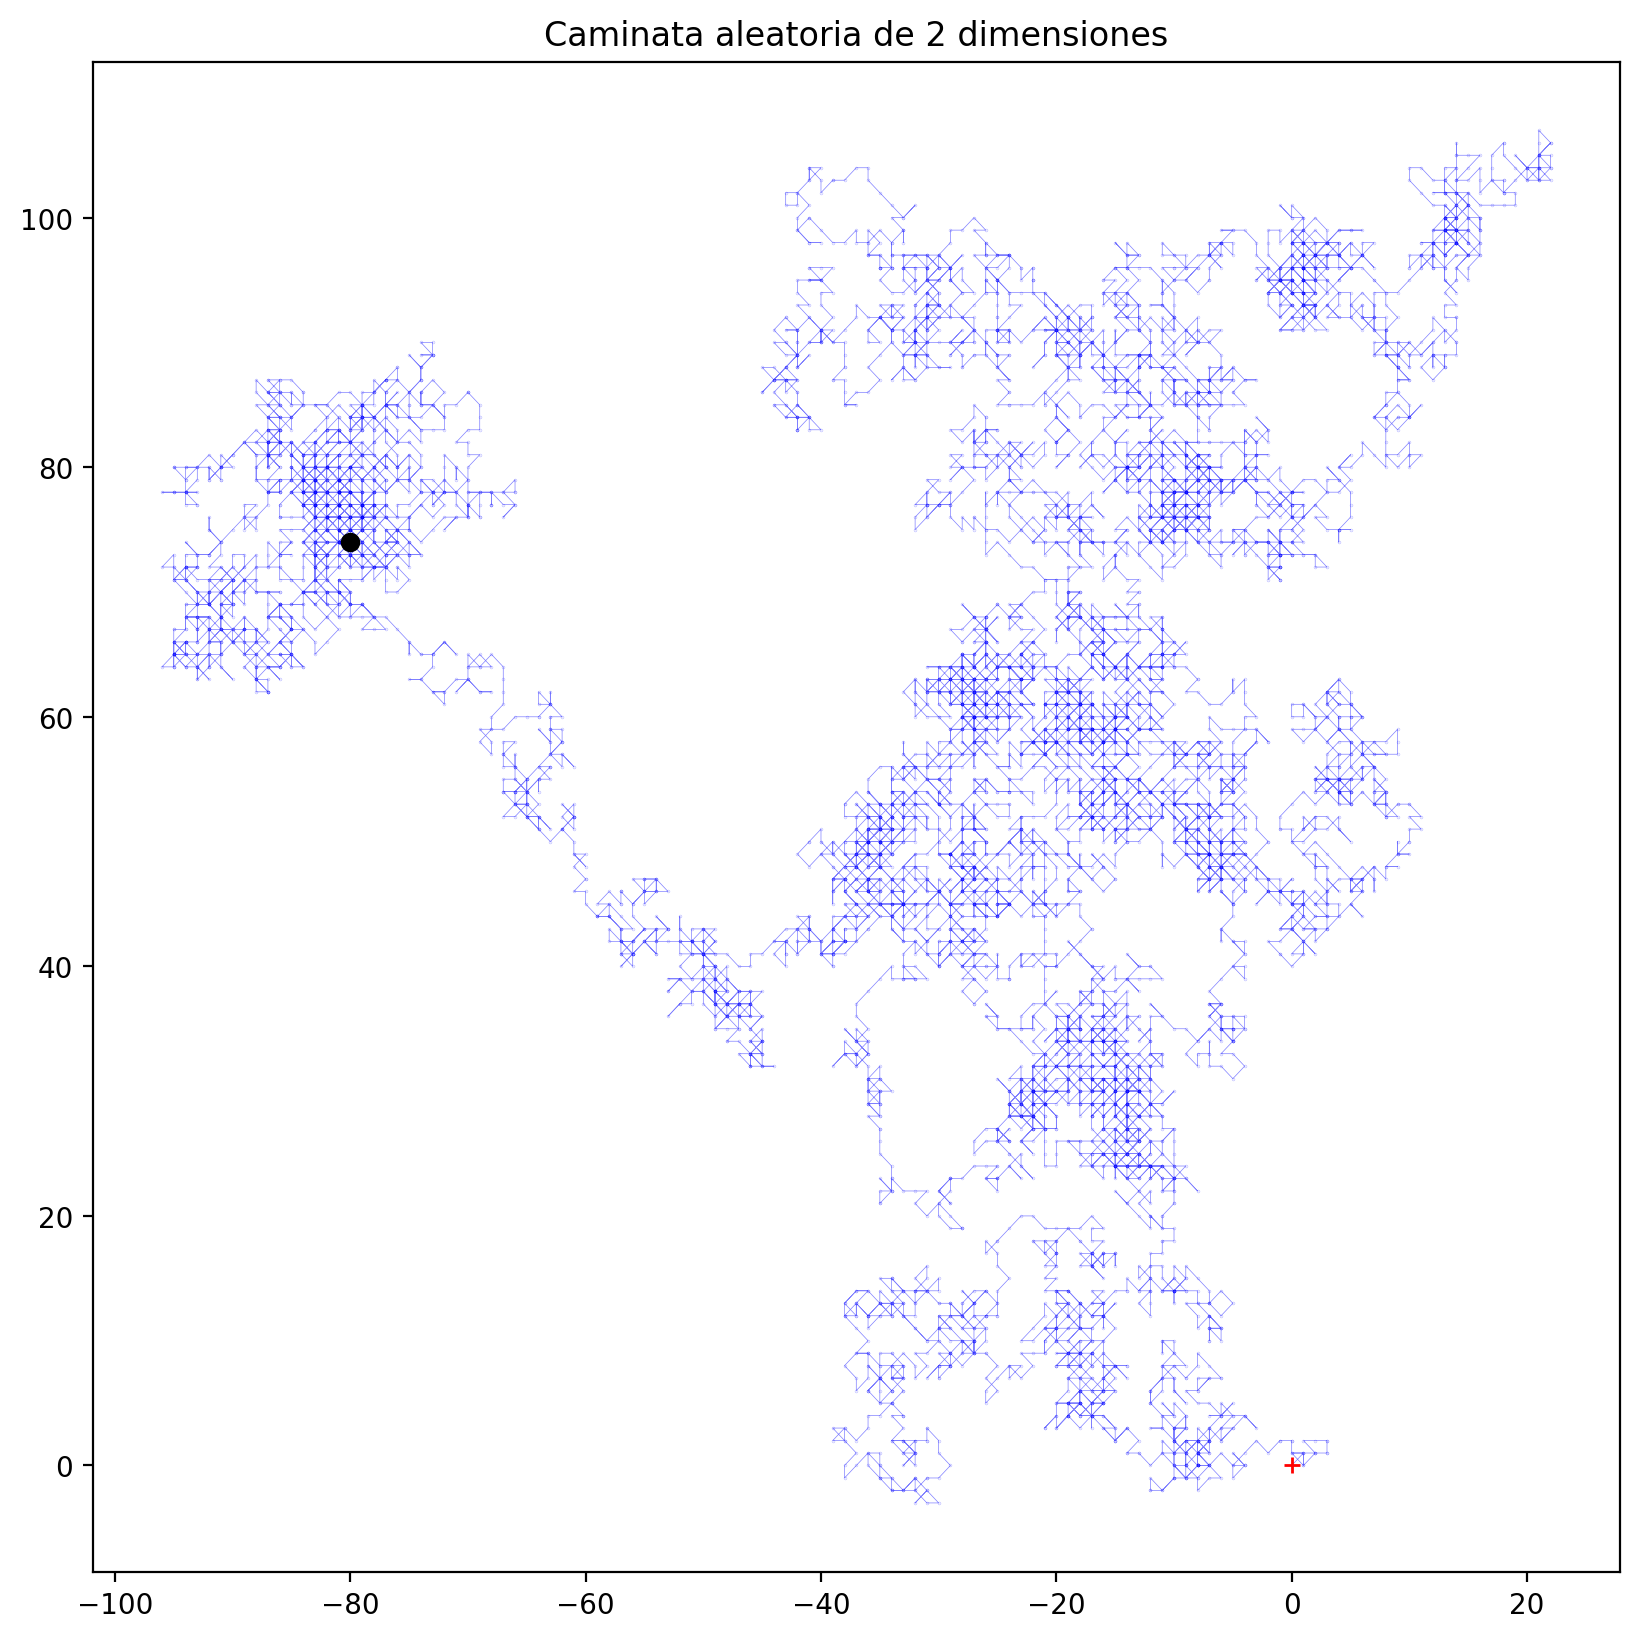

In [33]:
# Definamos los parametros de nuestra caminata aleatoria
#Numero de dimensiones
dims = 2

#Numero de pasos
step_n = 10000

#Conjunto de decision de los pasos a dar
step_set = [-1, 0, 1]

#El origen
origin = np.zeros((1,dims))

# Simulación en  2D
step_shape = (step_n,dims)

steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]
# Plot the path
fig = plt.figure(figsize=(8,8),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(path[:,0], path[:,1],c='blue',alpha=0.25,s=0.05)
ax.plot(path[:,0], path[:,1],c='blue',alpha=0.5,lw=0.25,)
ax.plot(start[:,0], start[:,1],c='red', marker='+')
ax.plot(stop[:,0], stop[:,1],c='black', marker='o')
plt.title('Caminata aleatoria de 2 dimensiones')
plt.tight_layout(pad=0)


## 4.5 Movimiento Browniano Geometrico

El movimiento browniano geométrico (GBM)  es un proceso estocástico de tiempo **continuo** en el que el logaritmo de la cantidad variable  sigue aleatoriamente un movimiento browniano (también llamado proceso de Wiener) con deriva  (drift). Es un  proceso estocásticos que satisface una ecuación diferencial estocástica (SDE).

Suele ser utilizado para modelar los precios de las acciones.

<p><img alt="comparison  logo" width="350" height="220" src="https://i.stack.imgur.com/73jrO.png"
" align="center" hspace="10px" vspace="0px"></p>

Al despejar la ecuación esocastica obtenemos un valor para $S_{t}$ así:

$S_{t}=S_{0}e^{(\mu-\frac{\sigma^{2}}{2})dt+\sigma w_{t}}$

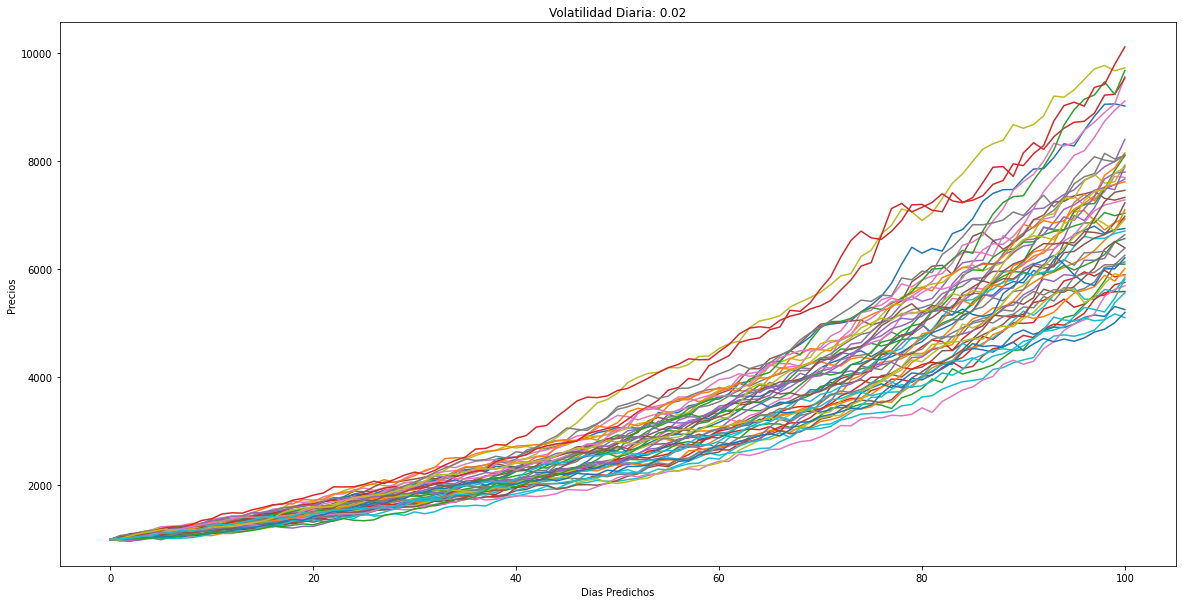

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#--------------------------------------------------- Movimiento Browniano Geometrico  ------------------------------------------------


# So    :   Precio inicial
# dt    :   incremento del tiempo -> un dia en nuestro caso
# T     :   Horizonte de tiempo
# N     :   T/dt
# t     :   array de los puntos en el tiempo [1, 2, 3, .. , N]
# mu    :   media de los retornos diarios historicos
# sigma :   desviacion estandar de los retornos historicos diarios
# b     :   array para los incrementos brownianos
# W     :   array de la senda browniana


#  Asignación de parametros
So = 1000
dt = 1 # incremento de un dia  
T = 100 # numero de dias
N = T / dt
t = np.arange(1, int(N) + 1)
mu = 0.02
sigma = 0.02
scen_size = 50 


b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

# Parametros de difusion y deriva (drift)
drift = (mu - 0.5 * sigma**2) * t

diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}


# Simulaciones de nuestro activo y precio
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S)) 


#  Grafico de las simulaciones
plt.figure(figsize = (20,10))
for i in range(scen_size):
    plt.title("Volatilidad Diaria: " + str(sigma))
    plt.plot(range(len(S[i,:])) ,S[i, :])
    plt.ylabel('Precios')
    plt.xlabel('Dias Predichos')
plt.show()

